# Oscilador armónico amortiguado

![Departamento de Física, Facultad de Ciencias Exactas y Naturales, Universidad de Buenos Aires](figuras/logoDF.png "DF, FCEyN, UBA")  
©2021 [Víctor A. Bettachini](mailto:bettachini@df.uba.ar)  

----

## Amortiguación proporcional a la velocidad
<!--
![](figuras/shabana1996_fig5_6.png)  
-->
![](figuras/shabana_fig_1_11.png)  
La dinámica del sistema de la figura estará determinada por  
- m : masa
- k : rigidez (_stiffness_) de un resorte que proveé una fuerza elástica según el modelo de Hooke, $\vec{F}_\mathrm{elástica} = - k x \hat{x}$
- c : coeficiente de la fuerza de amortiguación modelizada lineal con la velocidad, provista por un amortiguador en cuyo interior un pistón está sumergido en un fluido viscoso como el aceite, $\vec{F}_\mathrm{amortiguación} = - c \dot{x} \hat{x}$
- F(t) : un fuerza externa arbitaria en el tiempo que eventualmente lo saque del equilibrio. 

In [1]:
import sympy as sym # biblioteca de cálculo simbólico
import sympy.physics.mechanics as mech # funciones para mecánica
mech.init_vprinting() # notación con puntos para derivadas temporales

In [2]:
t = sym.symbols('t') # tiempo
m, k, c = sym.symbols('m, k, c', positive = True) # características del sistema, magnitudes positivas
x, F = mech.dynamicsymbols('x, F') # coordenada y fuerza externa

In [3]:
unMedio = sym.Rational(1,2) # Rational: fracción de enteros, alternativamente podría haberse usado 0.5 
V = sym.Eq( sym.Symbol('V'), unMedio* k* x**2) # Energía potencial
V

En los sistemas que vimos siempre las fuerzas se obtenian de potenciales, es decir son conservativas, y en ese caso la 2.a ley de Newton sería

In [4]:
segundaLey_conservativas = sym.Eq( m* x.diff(t,2), -V.rhs.diff(x) ) # diff: deriva, rhs: lado derecho de ecuación
segundaLey_conservativas

Pero en este caso no se pude soslayar que hay fuerzas no conservativas actuando sobre el sistema.  
![](figuras/shabana_fig_1_11b.png)

In [5]:
f_NoConservativas = sym.Eq(sym.Symbol('F_{nc}'), F - c* x.diff(t) )
f_NoConservativas

No debemos olvidar estas fuerzas en el lado derecho de la 2.a ley.

In [6]:
segundaLey = sym.Eq( m* x.diff(t,2), -V.rhs.diff(x)+ f_NoConservativas.rhs )
segundaLey

## Dinámica
Esta ecuación diferencial lineal de segundo orden no es homogénea a causa de $F(t)$.

In [7]:
x_Dinámica_noHomogénea = sym.solve(segundaLey, F)[0] # despeja F
sym.Eq( x_Dinámica_noHomogénea, F) 

Analizaremos primero la solución para el caso homogéneo, esto es si $F = 0$.

In [8]:
x_Dinámica_Homogénea =  x_Dinámica_noHomogénea.subs(F,0)
sym.Eq(x_Dinámica_Homogénea, 0)

Esta ecuación se suele normalizar por la masa

In [9]:
x_Dinámica_masa = (x_Dinámica_Homogénea/ m).expand()
sym.Eq(x_Dinámica_masa, 0)

y asignarle símbolos particulares a los coeficientes de $x$ y $\dot{x}$:
- $\omega^2 = \frac{k}{m}$, siendo $\omega$ la frecuencia natural de oscilación del sistema 
- $\Gamma = \frac{c}{m}$. En algunos textos de física $\gamma$. En ingeniería se usa $\zeta = \frac{c}{m} \frac{1}{2 \omega}$.

In [10]:
omega, Gamma = sym.symbols('omega, Gamma', real=True)
x_Dinámica_masa = x_Dinámica_masa.subs([(k/m, omega**2), (c/m, Gamma) ])
sym.Eq(x_Dinámica_masa, 0)

Cuando se repasó el análisis de pequeñas oscilaciones del **péndulo ideal** se vió que puede proponerse una solución con una exponencial compleja
$$
    x = \operatorname{e}^{\lambda t},
$$
en cuyo caso esta ecuación queda
$$
    \left( \Gamma \lambda + \omega^2 +\lambda^2 \right) \mathrm{e}^{\lambda t} = 0,
$$
que como se busca una solución no trivial obliga a que el término entre paréntesis sea nulo
$$
    \lambda^2 + \Gamma \lambda + \omega^2 = 0.
$$
Resolviendo tal ecuación cuadrática para $\lambda$ se obtiene
$$
    \lambda = \frac{1}{2} \left( -\Gamma \pm \sqrt{\Gamma^2 - 4 \omega^2} \right).
$$
Como hay dos posibles $\lambda$, la solución será una combinación lineal de las dos posibles soluciones pesadas por coeficientes que llamaremos $C_i$
$$
    \boxed{
    x = C_1 \operatorname{e}^{\frac{1}{2} \left( -\Gamma - \sqrt{\Gamma^2 - 4 \omega^2} \right) t} + C_2 \operatorname{e}^{\frac{1}{2} \left( -\Gamma + \sqrt{\Gamma^2 - 4 \omega^2} \right) t}
    }.
$$

Idéntico resultado puede obtener Python con la biblioteca de cálculo simbólico `sympy` a través de su función de resolución de ecuaciones diferenciales ordinarias `dsolve`:

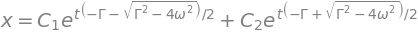

In [11]:
x_Dinámica_sol = sym.dsolve(x_Dinámica_masa) # dsolve: resuelve ecuaciones diferenciales
x_Dinámica_sol

## Analizando la solución

Lo primero que salta a la vista es que hay un factor común
$$
\operatorname{e}^{- \frac{\Gamma}{2} t},
$$
que paulatinamente irá reduciendo la amplitud de $x(t)$ y para $t \to \infty$ _matará_ la dinámica.
Que tán rápido sucede esto se cuantifica con un **período de relajación** $\tau = 2 \Gamma^{-1}$ en que la amplitud decae en $\operatorname{e}^{-1}$.
A los fines experimentales se considera que trancurrido $\sim 10 \tau$ la oscilación se considera extinta.

Es evidente que la relación del amortiguamiento $\Gamma$ y la frecuencia de oscilación $\omega$ determina la dinámica. Si
- $\Gamma^2 = 0$ debiera recuperse el caso de oscilador libre,
- $\Gamma^2 < 4 \omega^2$ la raiz da un complejo dándonos oscilaciones,
- $\Gamma^2 = 4 \omega^2$ solo queda el factor común visto, y
- $\Gamma^2 > 4 \omega^2$ el amortiguamiento no da tiempo a múltiples oscilaciones.

## No amortiguado

Si no hay amortiguamiento, $\Gamma = 0$, debiera recuperarse la solución para el oscilador libre

In [12]:
x_noAmortiguado = x_Dinámica_sol.subs(Gamma, 0)
x_noAmortiguado

Como $\omega$ en principio podría ser cualquier número real `sympy` muy conservadoramente da la solución con $|\omega|$.
Pero esto no es matemática, sino física y no tienen sentido un $\omega < 0$.
Se substituye $|\omega|$ con $\omega$ para ahorrarse dolores de cabeza.

In [13]:
x_noAmortiguado = x_noAmortiguado.subs(sym.Abs(omega), omega)
x_noAmortiguado

Para visualizar estos comportamientos pueden determinarse los $C_i$ en función de los $x$ y $\dot{x}$ conocidos en un determinado $t$, las llamadas condiciones iniciales.

Si para $t_0 = 0$ se conocen $x_0 = x(t_0)$ y $\dot{x}_0 = \dot{x}(t_0)$

In [14]:
x_0, dx_0 = sym.symbols('x_0 \dot{x}_0', real=True)

se los sustituye en la solución y su derivada para obtener los $C_i$

In [15]:
sym.Eq(x_0, x_noAmortiguado.args[1].subs(t, 0) )

In [16]:
sym.Eq(dx_0, x_noAmortiguado.args[1].diff(t).subs(t, 0) )

In [17]:
noAmortiguado_condInic = [sym.Eq(x_0, x_noAmortiguado.args[1].subs(t, 0) ), sym.Eq(dx_0, x_noAmortiguado.args[1].diff(t).subs(t, 0) ) ]
noAmortiguado_condInic_sol = sym.solve(noAmortiguado_condInic)
noAmortiguado_condInic_sol

Substituyendo estos $C_i$ ahora en función de $x(t_0)$ y $\dot{x}(t_0)$ arribamos a la solución:

In [18]:
x_noAmortiguado_condInic = x_noAmortiguado.subs(noAmortiguado_condInic_sol[0] )
x_noAmortiguado_condInic

Esta solución incluyendo las condiciones iniciales se corresponde con la vista para el **péndulo ideal**
$$
    x(t)= x_0 \cos{(\omega t)} +  \frac{\dot{x}_0}{\omega} \sin{(\omega t)},
$$
basta con usar la fórmula de Euler, $\mathrm{e}^{\pm i \theta}= \cos{\theta} \pm i \sin{\theta}$,  para lograr una verificación analítica.

Pero no hay nada más práctico que un gráfico para verificar que la dinámica que detalla la solución es la esperada.
Para confeccionarlo hay que asignar valores a los parámetros del sistema.

In [19]:
k = 100 # [N m-1]
m = 1 # [kg]
x_0_magnitud = -0.5 # [m] posición inicial
dx_0_magnitud = 100 # [m s-1] velocidad inicial
parámetros ={
    x_0 : x_0_magnitud,
    dx_0 : dx_0_magnitud,
    omega : sym.sqrt(k/m)
}

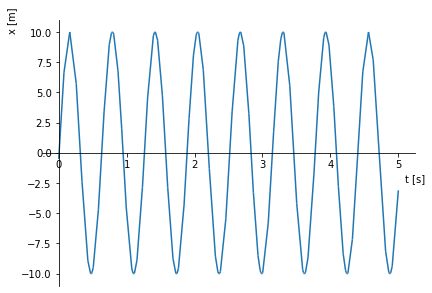

In [20]:
x_noAmortiguado_parámetros = x_noAmortiguado_condInic.subs(parámetros)
sym.plot(x_noAmortiguado_parámetros.rhs, (t,0, 5), ylabel='x [m]', xlabel='t [s]') 

## Subamortiguado

Si $\Gamma < 2 \omega$ la reducción de la amplitud por el amortiguamiento será gradual y aún se verán oscilaciones.
E.g. para un $\Gamma$ de un décimo del crítico, $\Gamma = \frac{1}{10} 2 \omega = \frac{1}{5} \omega$.

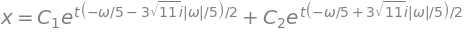

In [21]:
x_sub = x_Dinámica_sol.subs(Gamma, omega/ 5)
x_sub

además de las exponenciales complejas podría sacarse el factor común que reduce la amplitud.

Nuevamente se substituye $|\omega|$ por $\omega$

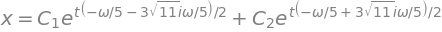

In [22]:
x_sub = x_sub.subs(sym.Abs(omega), omega)
x_sub

Se determinan los $C_i$ en función de $x_0, \dot{x}_0$

In [23]:
sub_condInic = [sym.Eq(x_0, x_sub.args[1].subs(t, 0) ), sym.Eq(dx_0, x_sub.args[1].diff(t).subs(t, 0) ) ]
sub_condInic_sol = sym.solve(sub_condInic)
sub_condInic_sol

y se los reemplaza en la solución anterior

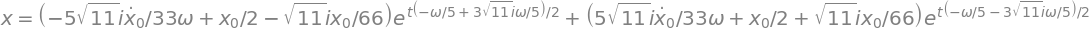

In [24]:
x_sub_condInic = x_sub.subs(sub_condInic_sol[0] )
x_sub_condInic

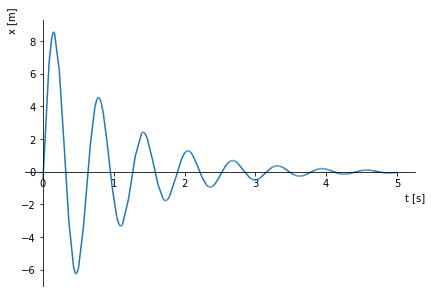

In [25]:
x_sub_parámetros = x_sub_condInic.subs(parámetros)
sym.plot(x_sub_parámetros.rhs, (t,0, 5), ylabel='x [m]', xlabel='t [s]') 

La oscilación es perceptible aún por varios períodos de oscilación a medida que su amplitud se ve reducida por el factor de amortiguamiento $\operatorname{e}^{-\frac{\Gamma}{2}}$.

A no ser por este factor la solución es similar a la del caso sin amortiguamiento, pero con una frecuencia de oscilación menor que $\omega$.
¿Porqué menor?
Recordemos la solución general para la dinámica.

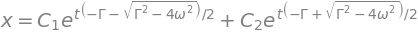

In [37]:
x_Dinámica_sol

Multiplicando a $\operatorname{e}^{-\frac{\Gamma}{2}}$ en cada término hay otra exponencial
$$
    \operatorname{e}^{\pm \frac{1}{2} \sqrt{\Gamma^2 - 4 \omega^2}}.
$$
Como $\Gamma < 2 \omega$ la raiz en el argumento es negativa y es por eso que tenemos oscilaciones pues estas exponenciales se pueden re-escribir como funciones trigonométricas de frecuencia angular
$$
    \omega' = \frac{1}{2} \left| \sqrt{\Gamma^2 - 4 \omega^2} \right|.
$$
Así la solución para el caso _sub-amortiguado_ la posición está descripta por la función
$$
    x(t)= \operatorname{e}^{- \frac{\Gamma}{2} t} \left[ x_0 \cos(\omega' t) + \frac{\dot{x}_0 + \frac{\Gamma}{2} x_0 }{\omega} \sin(\omega' t) \right].
$$

### Críticamente amortiguado
Si $\Gamma$ es corresponde exactamente con el crítico, $\Gamma = 2 \omega$, se logra el comportamiento más sencillo

In [38]:
x_crit = x_Dinámica_sol.subs(Gamma, 2* omega).simplify()
x_crit

que se trata de un acercamiento exponencial a la posición de equilibrio. 

De las condiciones iniciales se obtienen los $C_i$

In [27]:
crit_condInic = [sym.Eq(x_0, x_crit.args[1].subs(t, 0) ), sym.Eq(dx_0, x_crit.args[1].diff(t).subs(t, 0) ) ]
crit_condInic_sol = sym.solve(crit_condInic)
crit_condInic_sol

Substituyendo tales $C_i$ ahora en función de $x(t_0)$ y $\dot{x}(t_0)$ arribamos a la solución:

In [28]:
x_crit_condInic = x_crit.subs(crit_condInic_sol[0] )
x_crit_condInic.simplify()

Con los mismos parámetros del sistema la solución es

In [29]:
x_crit_parámetros = x_crit_condInic.subs(parámetros)
x_crit_parámetros

Esta dependencia es fácilmente analizable en un gráfico:

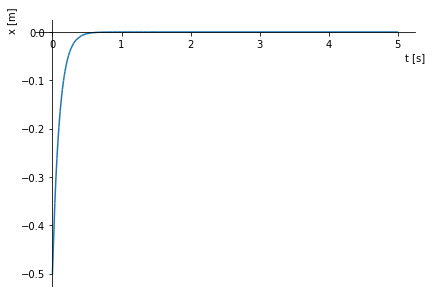

In [30]:
sym.plot(x_crit_parámetros.rhs, (t,0, 5), ylabel='x [m]', xlabel='t [s]') 

Claramente se ve un brusco efecto del amortiguamiento llevando rápidamente el sistema al equilibrio.

### Sobreamortiguado
Si $\Gamma > 2 \omega $ el amortiguamiento es aún más pronunciado.
E.g. para un $\Gamma$ del doble del crítico, $\Gamma = 2\, 2 \omega = 4 \omega$, no habrá exponenciales complejas pero sí el factor común que reduce la amplitud.

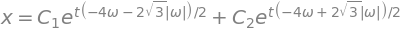

In [31]:
x_sobre = x_Dinámica_sol.subs(Gamma, 4* omega)
x_sobre

También en este caso habrá un rápido acercamiento exponencial a $x=0$, pero con un comportamiento que puede ser desastroso en un sistema mecánico real.
Lo veremos en breve.

La usual sustitución $|\omega|$ por $\omega$

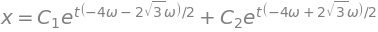

In [32]:
x_sobre = x_sobre.subs(sym.Abs(omega), omega)
x_sobre

y obtención de los $C_i$ a partir de las condiciones iniciales $x_0, \dot{x}_0$

In [33]:
sobre_condInic = [sym.Eq(x_0, x_sobre.args[1].subs(t, 0) ), sym.Eq(dx_0, x_sobre.args[1].diff(t).subs(t, 0) ) ]
sobre_condInic_sol = sym.solve(sobre_condInic)
sobre_condInic_sol

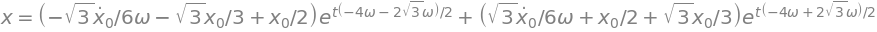

In [34]:
x_sobre_condInic = x_sobre.subs(sobre_condInic_sol[0] )
x_sobre_condInic

Sacando el factor común de una exponencial decreciente en el tiempo responsable de la disminución de la amplitud, $\operatorname{e}^{-2 \omega t}$, hay dos exponenciales reales con signo conjugado.
Estas exponenciales pueden re-escribirse como funciones hiperbólicas haciendo uso de que $\operatorname{e}^{\pm\theta} = \cosh(\theta) \pm \sinh(\theta)$.
Se llega a una solución
$$
    x(t)= \operatorname{e}^{- \frac{\Gamma}{2} t} \left[ x_0 \cosh(\omega' t) + \frac{\dot{x}_0 + \frac{\Gamma}{2} x_0}{\omega} \sinh(\omega' t) \right]
    \qquad \omega' = \frac{1}{2} \sqrt{\Gamma^2 - 4 \omega^2} .
$$

A diferencia de sus parientes trigonométricos, tales funciones hiperbólicas se apartan rápidamente del cero. 
El efecto de esto se puede apreciar graficando la dinámica.

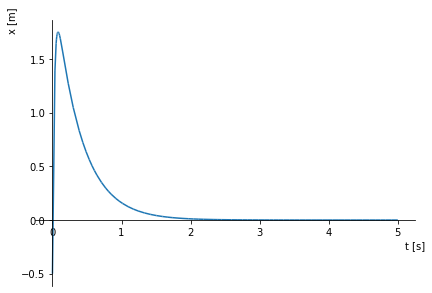

In [35]:
x_sobre_parámetros = x_sobre_condInic.subs(parámetros)
sym.plot(x_sobre_parámetros.rhs, (t,0, 5), ylabel='x [m]', xlabel='t [s]') 

Con las mismas condiciones iniciales que en el caso críticamente amortiguado se produjo un violento **sobre-tiro**.
Esto no sucede necesariamente para cada condición inicial, pero el hecho de que sea posible de que se produzca está única pero muy rápida oscilación puede ser perjudicial para el sistema.
Imagine si la amortiguación de un automóvil funcionará así: tras un pequeño bache se puede producir un gran salto que lo despegue del asfalto.